In [1]:
# from deepxde.backend.set_default_backend import set_default_backend
# set_default_backend("tensorflow")

Using backend: tensorflow



Setting the default backend to "tensorflow". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


In [20]:
import tensorflow as tf
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [21]:
pi = tf.constant(m.pi)

def ode_system(t, u):
    du_t = dde.grad.jacobian(u, t)
    return du_t - tf.math.cos(2*pi*t)

In [22]:
def boundary(t, on_initial):
    return on_initial and np.isclose(t[0], 0)

In [44]:
geom = dde.geometry.TimeDomain(0, 5)

ic = dde.IC(geom, lambda t: 1, boundary)

# Reference solution to compute the error
def true_solution(t):
    return np.sin(2*np.pi*t)/(2*np.pi) + 1

data = dde.data.PDE(geom,
                    ode_system,
                    ic,
                    num_domain = 30,
                    num_boundary = 2,
                    solution = true_solution,
                    num_test = 100)

In [45]:
layer_size = [1] + [32] + [1]
activation = "tanh"
initializer = "Glorot uniform"

NN = dde.maps.FNN(layer_size, activation, initializer)

In [46]:
model = dde.Model(data, NN)
model.compile("adam", lr = 0.001)

Compiling model...
'compile' took 0.000444 s



Training model...

Step      Train loss              Test loss               Test metric
24000     [5.13e-04, 4.72e-08]    [2.53e-03, 4.72e-08]    []  
25000     [4.62e-04, 9.72e-10]    [2.40e-03, 9.72e-10]    []  
26000     [4.22e-04, 1.02e-07]    [2.27e-03, 1.02e-07]    []  
27000     [3.89e-04, 2.27e-11]    [2.18e-03, 2.27e-11]    []  
28000     [3.68e-04, 5.03e-06]    [2.15e-03, 5.03e-06]    []  
29000     [3.40e-04, 8.83e-07]    [1.99e-03, 8.83e-07]    []  
30000     [3.16e-04, 4.77e-09]    [1.95e-03, 4.77e-09]    []  

Best model at step 30000:
  train loss: 3.16e-04
  test loss: 1.95e-03
  test metric: []

'train' took 1.857782 s



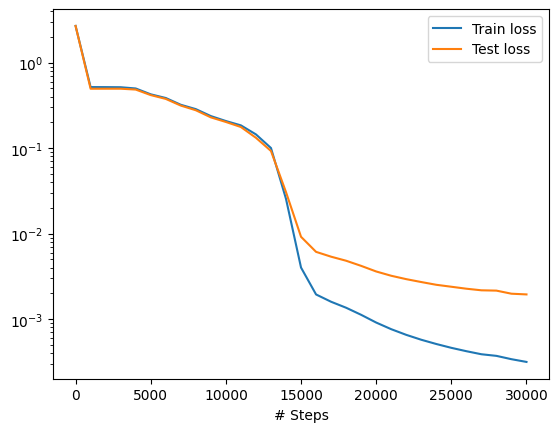

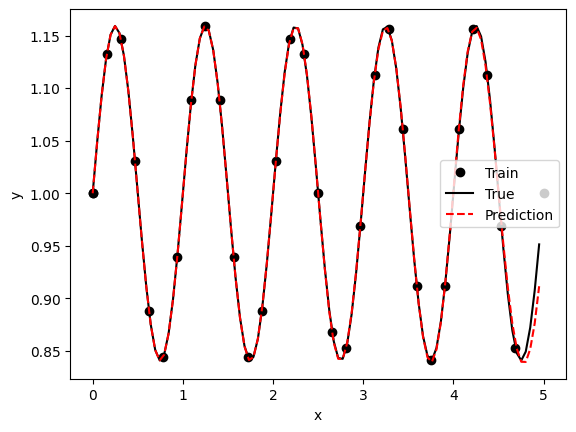

In [53]:
losshistory, train_state = model.train(epochs = 6000)
dde.saveplot(losshistory, train_state, issave = False, isplot = True)

In [56]:
N = 500
x = np.linspace(0, 10, N, endpoint=True).reshape(-1,1)

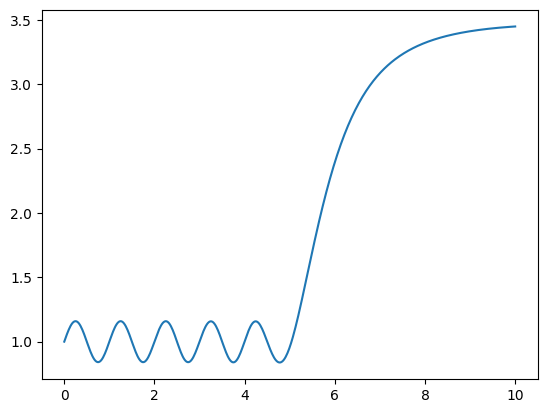

In [57]:
plt.plot(x,model.predict(x))